In [1]:
import numpy as np

#convolution
from scipy.signal import convolve2d

#to read an image from a url
from imageio import imread

import matplotlib.pyplot as plt
from IPython.display import display
display('svg')

'svg'

### Manual 2D convolution in numpy/scipy

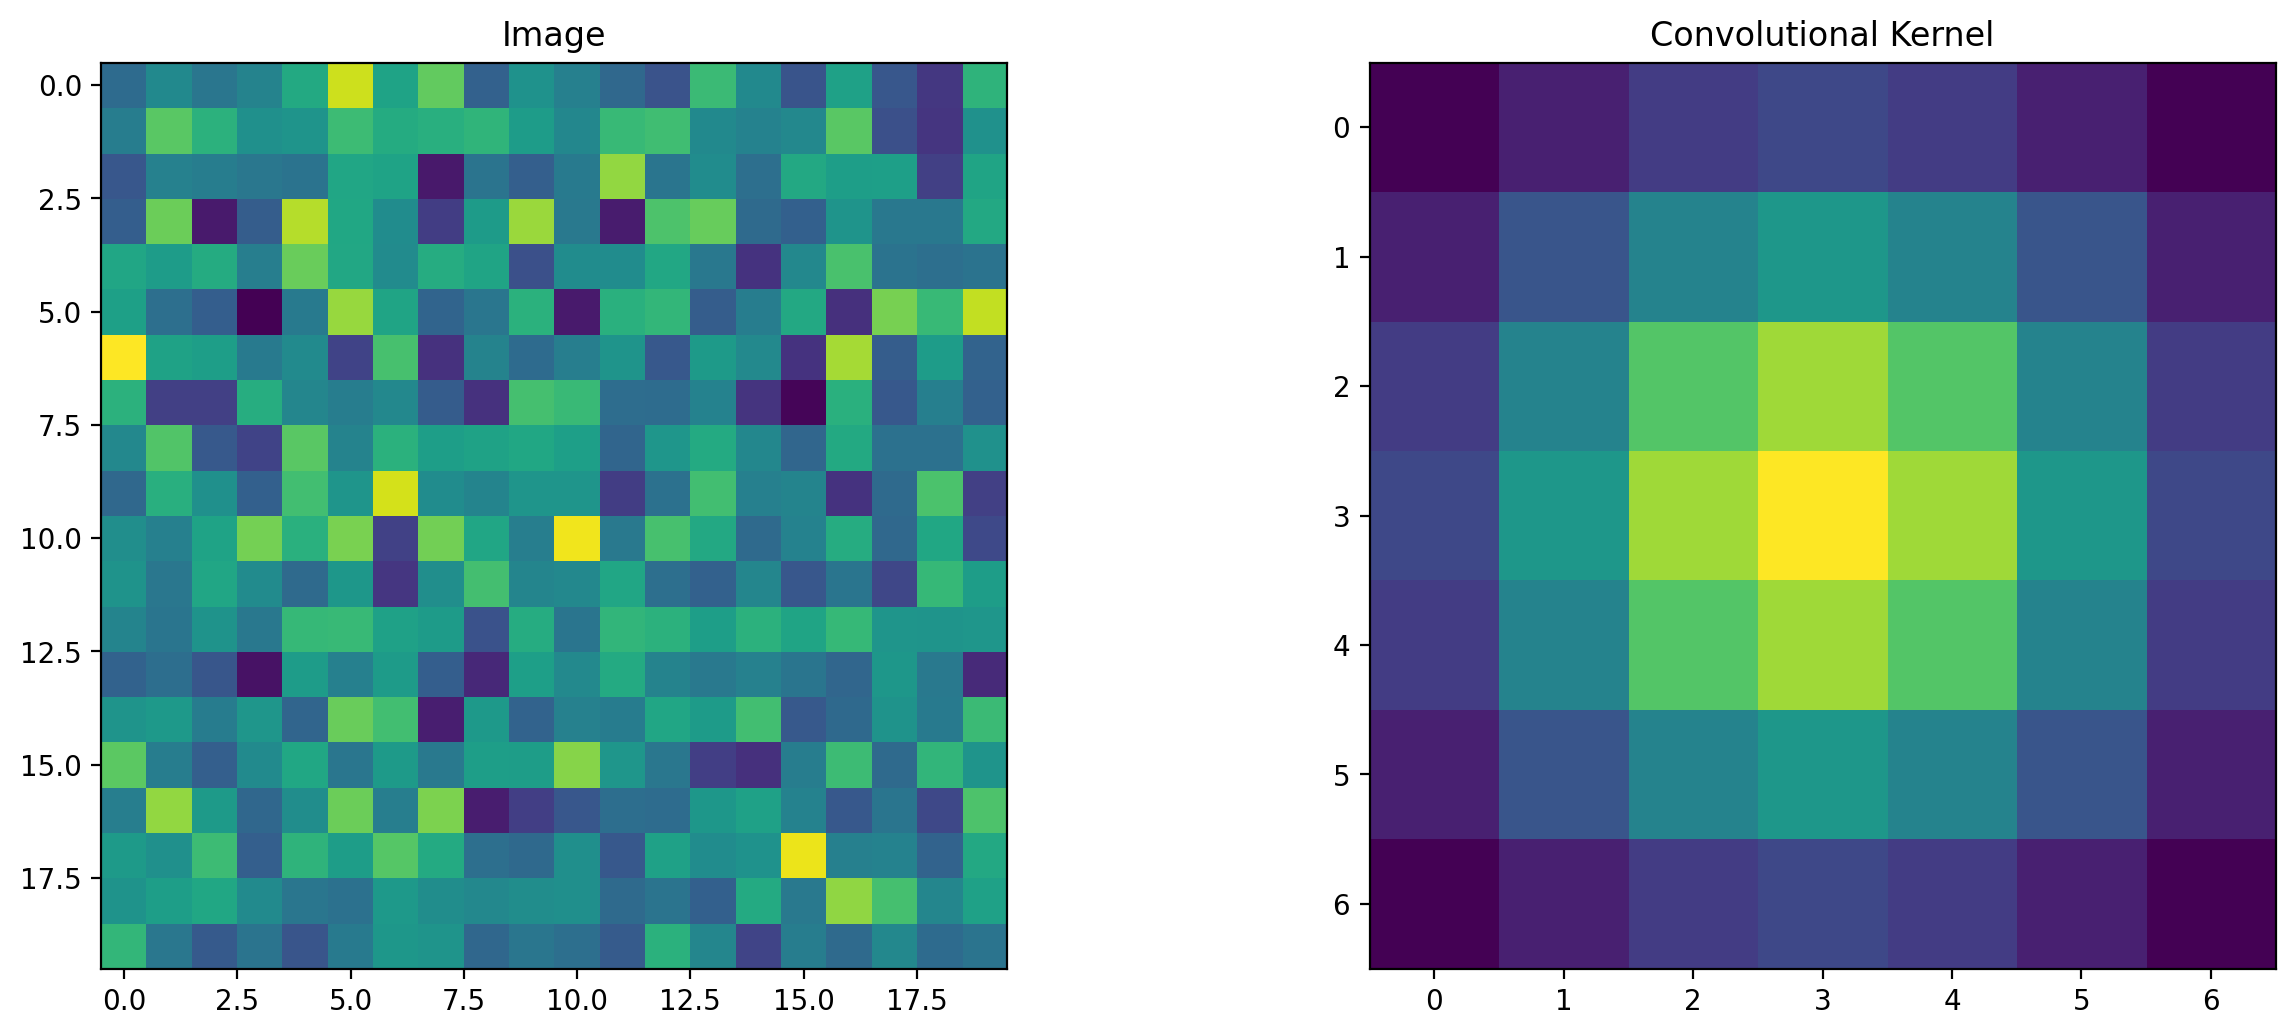

In [2]:
#image
imgN = 20
image = np.random.randn(imgN, imgN)

#convilution kernel
kernelN = 7
Y,X = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel = np.exp( -(X**2+Y**2)/7 )

#Let's see what they look like
fig,ax = plt.subplots(1,2,figsize=(15,6),dpi=200)
ax[0].imshow(image)
ax[0].set_title('Image')

ax[1].imshow(kernel)
ax[1].set_title('Convolutional Kernel')

plt.show()

In [3]:
#now for the convolution
convoutput = np.zeros((imgN,imgN))
halfkr = kernelN//2

for rowi in range(halfkr,imgN-halfkr):
    for coli in range(halfkr,imgN-halfkr):

        #cut out a piece of the image
        piece_of_img = image[rowi-halfkr:rowi+halfkr+1,:]    #get the rows
        piece_of_img = piece_of_img[:,coli-halfkr:coli+halfkr+1] #extract the columns

        #dot product: elementwise muplitply and sum( and flip the kernel for "real convolution"
        dotprod = np.sum(piece_of_img*kernel[::-1,::-1])

        #store the result for this pixel
        convoutput[rowi,coli] = dotprod

In [4]:
convoutput2 = convolve2d(image,kernel, mode='valid')

Text(0.5, 1.0, "Schipy's Convolution")

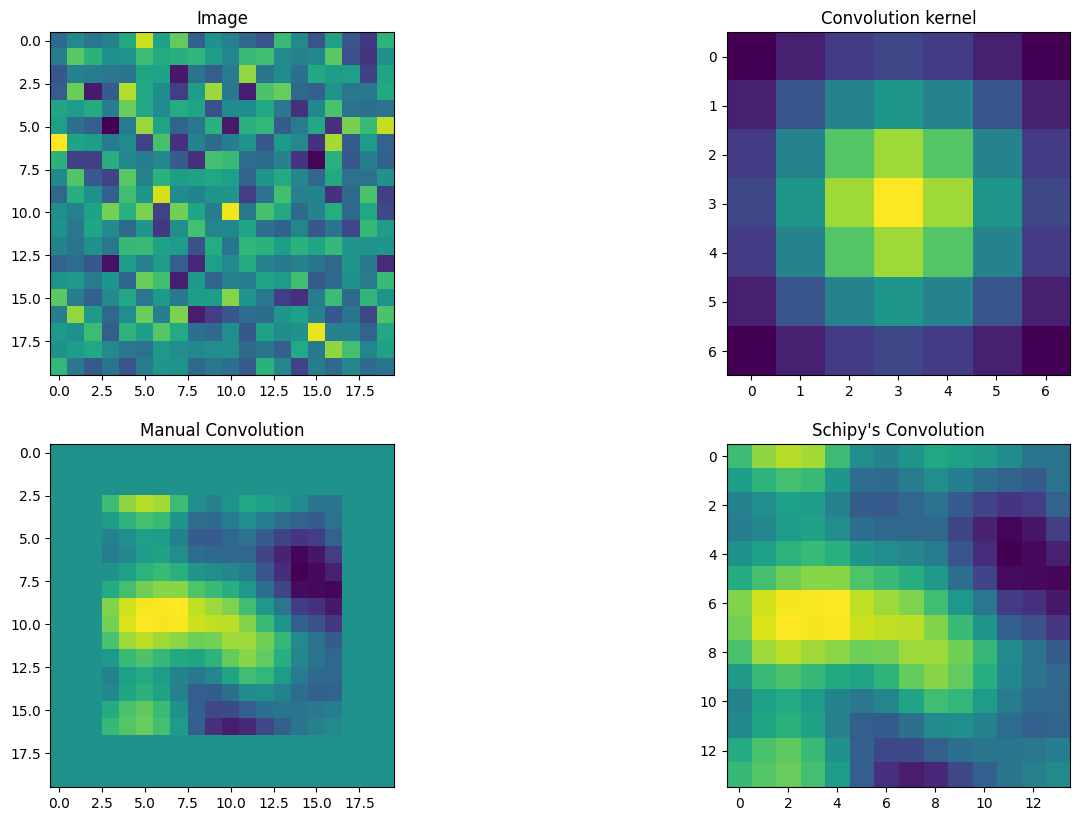

In [5]:
fig,ax = plt.subplots(2,2,figsize=(16,10),dpi=100)

ax[0,0].imshow(image)
ax[0,0].set_title("Image")

ax[0,1].imshow(kernel)
ax[0,1].set_title("Convolution kernel")

ax[1,0].imshow(convoutput)
ax[1,0].set_title("Manual Convolution")

ax[1,1].imshow(convoutput2)
ax[1,1].set_title("Schipy's Convolution")

### Example of Convolution with different kernel in real image

(1675, 3000, 3)
(1675, 3000)


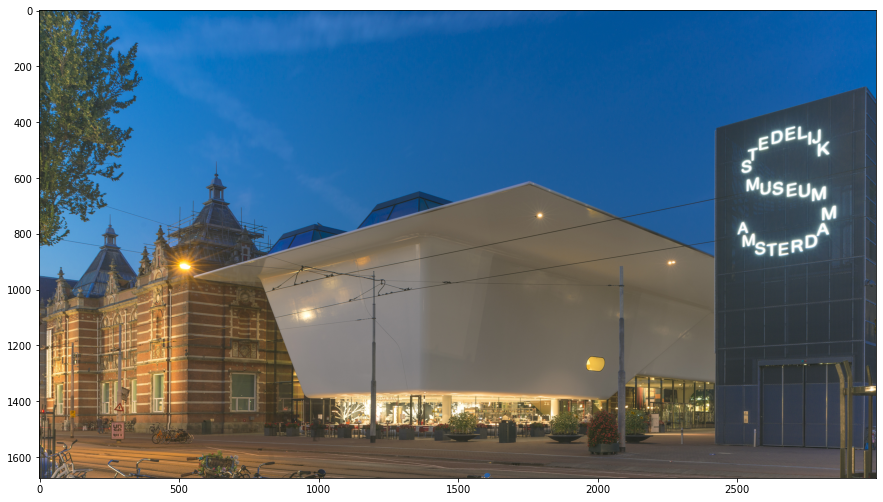

In [6]:
# read a pic from the web
bathtub = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')

#check the size
print(bathtub.shape)

#let's see what famous bthatub Museum looks like
fig = plt.figure(figsize=(15,10))
plt.imshow(bathtub);

#transform to 2D for convinience(not necessary for convolution!)
bathtub = np.mean(bathtub,axis=2)
bathtub = bathtub/np.max(bathtub)

#check the size again
print(bathtub.shape)

In [7]:
# hand-craft two convolution kernels

# vertical kernel
VK = np.array([ [1,0,-1],
                [1,0,-1],
                [1,0,-1] ])

# horizontal kernel
HK = np.array([ [ 1, 1, 1],
                [ 0, 0, 0],
                [-1,-1,-1] ])

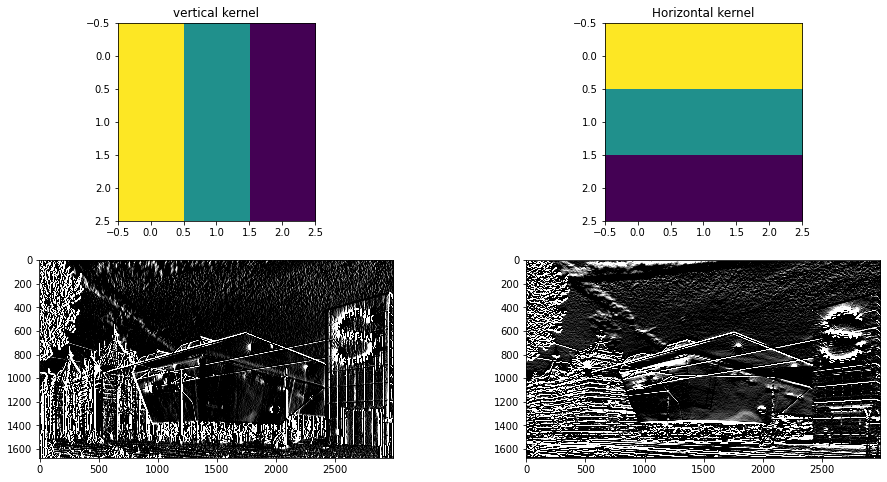

In [8]:
fig,ax = plt.subplots(2,2,figsize = (16,8))

ax[0,0].imshow(VK)
ax[0,0].set_title("vertical kernel")

ax[0,1].imshow(HK)
ax[0,1].set_title("Horizontal kernel")

#run convolution and show the result
convres = convolve2d(bathtub,VK,mode= 'same')
ax[1,0].imshow(convres,cmap='gray',vmin=0,vmax=.01)

convres = convolve2d(bathtub,HK,mode= 'same')
ax[1,1].imshow(convres,cmap='gray',vmin=0,vmax=.01)
plt.show()

### implenting with Pytorch

In [9]:
# first, translate everything intoa tensor
import torch
import torch.nn.functional as F

VK_t= torch.tensor(VK).view(1,1,3,3).double() #number images in a batch, number of channel(grayscle here), height, width
HK_t = torch.tensor(HK).view(1,1,3,3).double()
bathtub_t = torch.tensor(bathtub).view(1,1,bathtub.shape[0],bathtub.shape[1])

print(VK_t.shape)
print(bathtub_t.shape)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 1675, 3000])


In [10]:
C = F.conv2d(bathtub_t,VK_t)
print(C.shape)

torch.Size([1, 1, 1673, 2998])


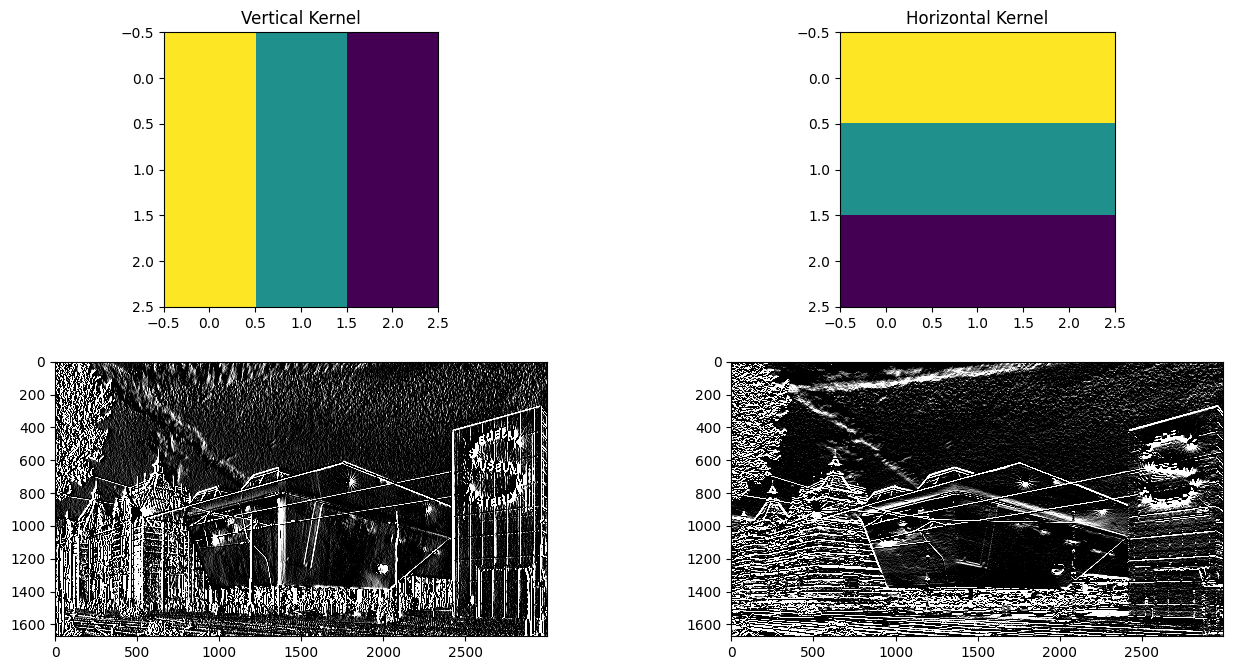

In [12]:
fig,ax = plt.subplots(2,2,figsize=(16,8),dpi=100)

ax[0,0].imshow(VK)
ax[0,0].set_title("Vertical Kernel")

ax[0,1].imshow(HK)
ax[0,1].set_title("Horizontal Kernel")

#run convolution and show the result

convres = F.conv2d(bathtub_t,VK_t)
img = torch.squeeze(convres.detach())
ax[1,0].imshow(img, cmap="gray",vmin=0,vmax=.01)

convres = F.conv2d(bathtub_t,HK_t)
img = torch.squeeze(convres.detach())
ax[1,1].imshow(img,cmap='gray',vmin=0,vmax=.01)

plt.show()